# Project Notebook


---
---
# Penguin Analysis
---
---

***
## Authorship and Resources Used
* Ali Khatai
* Some of the code for regressions is adapted from code from CS377 exercises authored by Prof. Brad Sheese

***
## Data Description and Source
* The dataset containes data about various physical features such as culmen length and depth, body mass and flipper length of 3 different types of penguin species as well as their Island of origin. In total, there are 344 entries in the dataset.
* I found the Dataset on [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) which was posted by Parul Pandey. The Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [the Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of [the Long Term Ecological Research Network](https://lternet.edu/).<br>**Citation:** Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

***
## Research Question
* Is there a correlation between a Penguins body mass and Physical features such as beak size and flipper length.

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
# enter and test your code here
# enter and test your code here

# install Kaggle
! pip install -q kaggle

from google.colab import files
files.upload()

# make kaggle directory and move the file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# API command for the dataset
! kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data

# unzip the data
! mkdir kaggledata
! unzip palmer-archipelago-antarctica-penguin-data.zip -d kaggledata

Saving kaggle.json to kaggle.json
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 7.26MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: kaggledata/penguins_lter.csv  
  inflating: kaggledata/penguins_size.csv  


In [ ]:
# Create the dataFrame from the CSV file
df = pd.read_csv('/content/kaggledata/penguins_size.csv', encoding= 'unicode_escape')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


***
## Inspect, clean and standardize data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


All data types seem to be good

In [ ]:
# There's some null values in the dataset, so we'll remove them
print(df.isna().sum())
print(df.shape)
df = df.dropna(axis='index')
print(df.shape)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
(344, 7)
(334, 7)


In [ ]:
# check for and remove duplicated rows
df.duplicated().sum()

0

culmen_length_mm     0.044569
culmen_depth_mm     -0.144090
flipper_length_mm    0.352752
body_mass_g          0.465714
dtype: float64


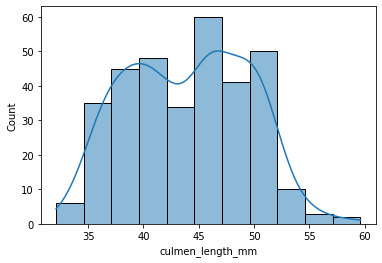

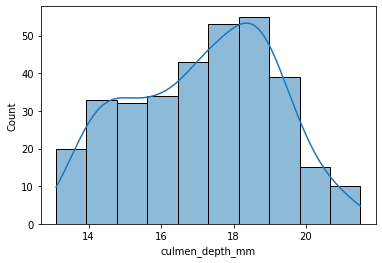

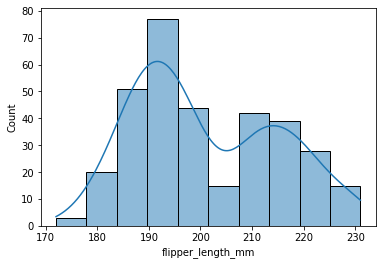

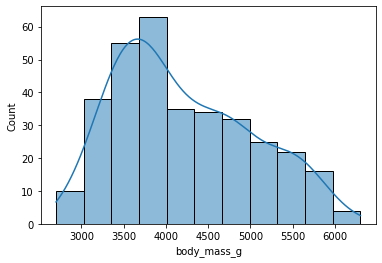

In [ ]:
# let's examine how skewed the numeric columns are
numeric_cols = df.select_dtypes(include = [np.number]).columns
print(df[numeric_cols].skew())

# lets visualize the data with histograms
for i in numeric_cols:
  # kde is used for a lineplot on the histogram
  sns.histplot(x=i, data=df, kde = True)
  plt.show()

The skewness is between -0.5 and 0.5 which indicates that the columns are fairly symmetrical, but lets see if we can improve this with np.log

culmen_length_mm    -0.156424
culmen_depth_mm     -0.328375
flipper_length_mm    0.257945
body_mass_g          0.168937
dtype: float64


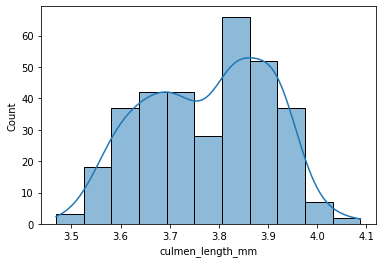

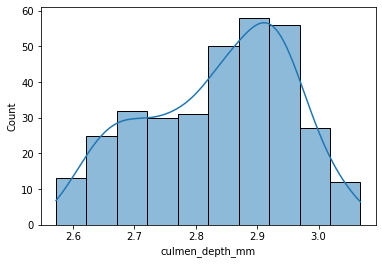

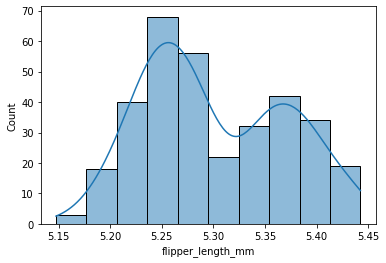

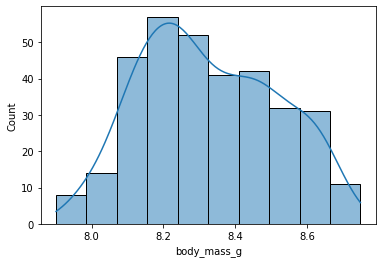

In [ ]:
# copy the dataframe and apply np.log
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].apply(np.log)
print(df_copy[numeric_cols].skew())

# lets visualize the data with histograms
for i in numeric_cols:
  # kde is used for a lineplot on the histogram
  sns.histplot(x=i, data=df_copy, kde = True)
  plt.show()

Using np.log seems to have somewhat imporved the skewness. Next we standardize the numeric columns using zscore

In [ ]:
print(df_copy.describe().T)
print('------------------------------')
df_copy[numeric_cols] = df_copy[numeric_cols].apply(np.log)
df_copy.describe().T

                   count      mean       std       min       25%       50%  \
culmen_length_mm   334.0  3.776284  0.125378  3.468856  3.676301  3.795489   
culmen_depth_mm    334.0  2.835888  0.116918  2.572612  2.747271  2.850707   
flipper_length_mm  334.0  5.300982  0.069163  5.147494  5.247024  5.283204   
body_mass_g        334.0  8.327162  0.188399  7.901007  8.174703  8.306472   

                        75%       max  
culmen_length_mm   3.883109  4.087656  
culmen_depth_mm    2.928524  3.068053  
flipper_length_mm  5.361292  5.442418  
body_mass_g        8.475066  8.748305  
------------------------------


,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,1.328188,0.033317,1.243825,1.301907,1.333813,1.356636,1.407972
culmen_depth_mm,334.0,1.041498,0.041566,0.944922,1.010608,1.047567,1.074498,1.121043
flipper_length_mm,334.0,1.667807,0.013027,1.638510,1.657661,1.664533,1.679205,1.694223
body_mass_g,334.0,2.119268,0.022591,2.066990,2.101044,2.117035,2.137128,2.168860


***
## Analyses and Visualizations
* Let's examine the correlations first. We mainly want to focus on the correlations between body mass and other columns


In [ ]:
df_copy.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.252529,0.657765,0.597450
culmen_depth_mm,-0.252529,1.000000,-0.586370,-0.467753
flipper_length_mm,0.657765,-0.586370,1.000000,0.858090
body_mass_g,0.597450,-0.467753,0.858090,1.000000


Body mass seems to have a strong correlation with flipper length and fairly strong correlations with culmen length and culmen depth. The culmen is basically the upper ridge of a bird's beak. Now, let's move onto the regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


First, We'll examine the relationship between body mass and culmen length.

Culmen Length
--------------------------------------------------
   intercept = 1.22
   coefficient = 0.0
   R squared = 0.36



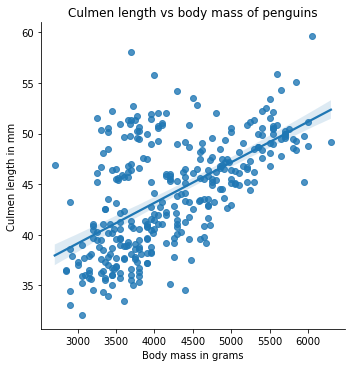

In [ ]:
#let's start by examining and vasialuzing the correlation between body mass and culmen length and culmen depth
# reshape Profit into an array named y
y = np.array(df_copy['culmen_length_mm']).reshape(-1,1)

#reshape predictor in an array named X
X = np.array(df['body_mass_g']).reshape(-1,1)

# create the model
model = LinearRegression()

# fit the data
model.fit(X,y)

# print the results
print('Culmen Length' + '\n' + ('-' * 50) + '\n' +
      '   ' + 'intercept = ' + str(model.intercept_.round(2)[0]) + '\n' +
      '   ' + 'coefficient = ' + str(model.coef_.round(2)[0,0]) + '\n' +
      '   ' + 'R squared = ' + str(model.score(X, y).round(2)) + '\n')

sns.lmplot(x='body_mass_g', y='culmen_length_mm', data=df)
plt.xlabel('Body mass in grams')
plt.ylabel('Culmen length in mm')
plt.title('Culmen length vs body mass of penguins')
plt.show()
print()

Body mass and Culmen length have an overall positive correlation with R squared value of 0.36.
Next, lets examine the realtionship between body mass and culmen depth. For this one, we'll make separate regressions for each species and see how they compare.

Culmen Length for the Adelie species
--------------------------------------------------
   intercept = -0.82
   coefficient = 0.9
   R squared = 0.35

Culmen Length for the Chinstrap species
--------------------------------------------------
   intercept = -1.08
   coefficient = 1.02
   R squared = 0.36

Culmen Length for the Gentoo species
--------------------------------------------------
   intercept = -2.22
   coefficient = 1.5
   R squared = 0.52



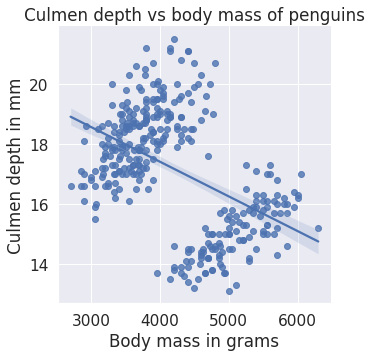

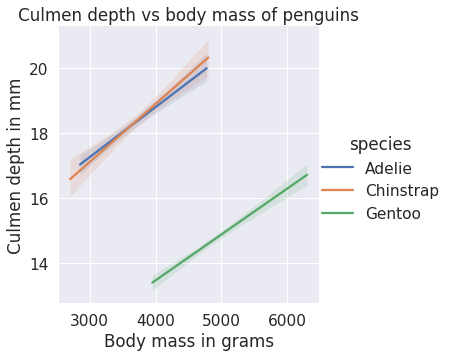

In [ ]:
#examining and vasialuzing the correlation between body mass and culmen depth
sns.set(font_scale=1.4)
# loop through all the species
for i in df['species'].unique():

    # filter our the required species
    mask = df_copy['species'] == i
    df_masked = df_copy[mask]

    #reshape outcome and predictor in an array named y and X respectfully
    y = np.array(df_masked['culmen_depth_mm']).reshape(-1,1)
    X = np.array(df_masked['body_mass_g']).reshape(-1,1)

    # create the model
    model = LinearRegression()

    # fit the data
    model.fit(X,y)

    # print the results
    print('Culmen Length for the ' +i+' species'+ '\n' + ('-' * 50) + '\n' +
          '   ' + 'intercept = ' + str(model.intercept_.round(2)[0]) + '\n' +
          '   ' + 'coefficient = ' + str(model.coef_.round(2)[0,0]) + '\n' +
          '   ' + 'R squared = ' + str(model.score(X, y).round(2)) + '\n')

# overall
sns.lmplot(x='body_mass_g', y='culmen_depth_mm', data=df)
plt.xlabel('Body mass in grams')
plt.ylabel('Culmen depth in mm')
plt.title('Culmen depth vs body mass of penguins')
plt.show()

# separated by species
sns.lmplot(x='body_mass_g', y='culmen_depth_mm', data=df, hue='species',scatter=False)
plt.xlabel('Body mass in grams')
plt.ylabel('Culmen depth in mm')
plt.title('Culmen depth vs body mass of penguins')
plt.show()
print()

For body mass and culmen depth first graph gives us an overall negative correlation, when we don't consider the species, but on the graph we can clearly see two distinct clusters of data, which indicates that the clusters might be for different categories of the data. if the clusters are considered separately then the correlation is positive. When we plot the results again and do separate regression for each species, we get positive correlation for each, with the strongest correlation for the Gentoo penguin with R squared of 0.52. This is also tells us that Gentoo penguins have smaller culmen depths than Adelie and chinstrap penguins. Also, I think the data is not spread evenly between each type of species, which is why the regression lines are in different parts of the plot.

flipper Length over all species
--------------------------------------------------
   intercept = 1.61
   coefficient = 0.0
   R squared = 0.75

flipper Length for the Adelie species
--------------------------------------------------
   intercept = 1.24
   coefficient = 0.2
   R squared = 0.21

flipper Length for the Chinstrap species
--------------------------------------------------
   intercept = 0.94
   coefficient = 0.34
   R squared = 0.39

flipper Length for the Gentoo species
--------------------------------------------------
   intercept = 0.95
   coefficient = 0.34
   R squared = 0.51



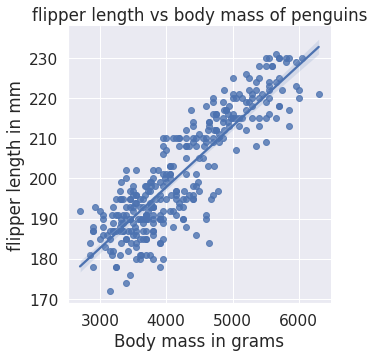

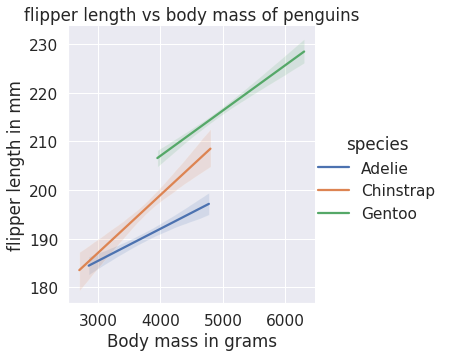

In [ ]:
# first Lets do regression for flipper length regardless of species

# reshape outcome into an array named y
y = np.array(df_copy['flipper_length_mm']).reshape(-1,1)

#reshape predictor in an array named X
X = np.array(df['body_mass_g']).reshape(-1,1)

# create the model
model = LinearRegression()

# fit the data
model.fit(X,y)

# print the results
print('flipper Length over all species' + '\n' + ('-' * 50) + '\n' +
      '   ' + 'intercept = ' + str(model.intercept_.round(2)[0]) + '\n' +
      '   ' + 'coefficient = ' + str(model.coef_.round(2)[0,0]) + '\n' +
      '   ' + 'R squared = ' + str(model.score(X, y).round(2)) + '\n')


# Now we can do separate regressions for each species

# loop through all the species
for i in df['species'].unique():

    # filter our the required species
    mask = df_copy['species'] == i
    df_masked = df_copy[mask]

    #reshape outcome and predictor in an array named y and X respectfully
    y = np.array(df_masked['flipper_length_mm']).reshape(-1,1)
    X = np.array(df_masked['body_mass_g']).reshape(-1,1)

    # create the model
    model = LinearRegression()

    # fit the data
    model.fit(X,y)

    # print the results
    print('flipper Length for the ' +i+' species'+ '\n' + ('-' * 50) + '\n' +
          '   ' + 'intercept = ' + str(model.intercept_.round(2)[0]) + '\n' +
          '   ' + 'coefficient = ' + str(model.coef_.round(2)[0,0]) + '\n' +
          '   ' + 'R squared = ' + str(model.score(X, y).round(2)) + '\n')

#visualize overall correaltion
sns.lmplot(x='body_mass_g', y='flipper_length_mm', data=df)
plt.xlabel('Body mass in grams')
plt.ylabel('flipper length in mm')
plt.title('flipper length vs body mass of penguins')
plt.show()

# separate by species now
sns.lmplot(x='body_mass_g', y='flipper_length_mm', data=df, hue='species',scatter=False)
plt.xlabel('Body mass in grams')
plt.ylabel('flipper length in mm')
plt.title('flipper length vs body mass of penguins')
plt.show()
print()

Overall correlation for flipper length and body mass regardless of the species is strongly positive with an R squared of 0.75. Gentoo penguins again have the strongest correlation among all the species with an R squared of 0.51.

***
## Conclusions
* Based on my analysis, the body mass of a penguin can be somewhat of a good metric to predict the culmen length and depth of a penguin. The body mass, however, seems to be a very good metric to predict the flipper length. The results would be most accurate for Gentoo penguins
* All the physical features which included culmen length and depth and flipper length were positively correlated with the body mass. This makes sense as the more mass a penguin has, the larger it will be. More mass also means the penguin is getting better nutrition which obviously promotes growth.


---
---